## Kings County Real Estate Analysis

Please fill out:
* Student name: Andrew Bennett
* Student pace: self paced / part time / full time
* Scheduled project review date/time: TBD
* Instructor name: Morgan Jones
* Blog post URL: TBD


## Project Overview
A Seattle real estate brokerage wants to expand their services to developers. They're offering "state of the art" data analysis to guide clients on where and what to build, as it relates to price.

This analysis would include, at a minimum, a linear regression model to examine the relationship between square footage and zip code on price. They'd also like to see how other factors, such as lot size, bedrooms, bathrooms, floors, affect the price, if at all.

## Business Understanding
The Seattle real estate market is always competitive. To stay ahead of the competition, a brokerage firm must attract new clients and keep them. To do this, KRG Realty is providing a data analytics package to lure buyers and sellers and developers to their business. This new package would provide linear regression modeling to analyze the relationship between square footage and zipcode at a minimum, as well as other factors such as lot size, bedrooms, bathrooms, floors, etc. 

## Data
To perform this analysis, we're utilizing data from the Kings County House Sales dataset in the form of a csv file (`data/kc_house_data.csv`).

### Step 1
Let's import the data and see what it looks like.

In [337]:
# Your code here - remember to use markdown cells for comments as well!
import pandas as pd

kc = pd.read_csv('data/kc_house_data.csv')
kc.head(20)

,id,date,price,bedrooms,bathrooms,sqft_living,sqft_lot,floors,waterfront,greenbelt,...,sewer_system,sqft_above,sqft_basement,sqft_garage,sqft_patio,yr_built,yr_renovated,address,lat,long
0,7399300360,5/24/2022,675000.0,4,1.0,1180,7140,1.0,NO,NO,...,PUBLIC,1180,0,0,40,1969,0,"2102 Southeast 21st Court, Renton, Washington ...",47.461975,-122.190520
1,8910500230,12/13/2021,920000.0,5,2.5,2770,6703,1.0,NO,NO,...,PUBLIC,1570,1570,0,240,1950,0,"11231 Greenwood Avenue North, Seattle, Washing...",47.711525,-122.355910
2,1180000275,9/29/2021,311000.0,6,2.0,2880,6156,1.0,NO,NO,...,PUBLIC,1580,1580,0,0,1956,0,"8504 South 113th Street, Seattle, Washington 9...",47.502045,-122.225200
3,1604601802,12/14/2021,775000.0,3,3.0,2160,1400,2.0,NO,NO,...,PUBLIC,1090,1070,200,270,2010,0,"4079 Letitia Avenue South, Seattle, Washington...",47.566110,-122.290200
4,8562780790,8/24/2021,592500.0,2,2.0,1120,758,2.0,NO,NO,...,PUBLIC,1120,550,550,30,2012,0,"2193 Northwest Talus Drive, Issaquah, Washingt...",47.532470,-122.071880
5,2807100156,7/20/2021,625000.0,2,1.0,1190,5688,1.0,NO,NO,...,PUBLIC,1190,0,300,0,1948,0,"1602 North 185th Street, Shoreline, Washington...",47.763470,-122.340155
6,5122400111,11/17/2021,1317227.0,3,3.0,2080,27574,1.0,NO,NO,...,PRIVATE,2080,0,0,150,1951,0,"2633 Southwest 164th Place, Burien, Washington...",47.455470,-122.367220
7,7137850210,4/28/2022,820000.0,3,2.5,2214,3506,2.0,NO,NO,...,PUBLIC,2214,0,440,206,2019,0,"24913 122nd Place Southeast, Kent, Washington ...",47.378355,-122.178625
8,2944500680,3/17/2022,780000.0,4,2.5,2340,8125,2.0,NO,NO,...,PUBLIC,2340,0,440,70,1989,0,"2721 Southwest 343rd Place, Federal Way, Washi...",47.293770,-122.369320
9,2619950340,6/21/2021,975000.0,4,2.5,2980,5859,2.0,NO,NO,...,PUBLIC,2980,0,540,170,2011,0,"27950 Northeast 147th Circle, Duvall, Washingt...",47.733170,-121.965305


We've successfully imported the CSV file into a data frame. We can see that there are 25 columns in this dataframe. Let's go ahead and input those columns name.

In [338]:
columns = kc.columns
columns

Index(['id', 'date', 'price', 'bedrooms', 'bathrooms', 'sqft_living',
       'sqft_lot', 'floors', 'waterfront', 'greenbelt', 'nuisance', 'view',
       'condition', 'grade', 'heat_source', 'sewer_system', 'sqft_above',
       'sqft_basement', 'sqft_garage', 'sqft_patio', 'yr_built',
       'yr_renovated', 'address', 'lat', 'long'],
      dtype='object')

We have the column names, stored here. It looks like we have a lot of standard real estate information, coupled with other address data. Let's see which information is numeric vs which is categoric.

In [339]:
kc.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 30155 entries, 0 to 30154
Data columns (total 25 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   id             30155 non-null  int64  
 1   date           30155 non-null  object 
 2   price          30155 non-null  float64
 3   bedrooms       30155 non-null  int64  
 4   bathrooms      30155 non-null  float64
 5   sqft_living    30155 non-null  int64  
 6   sqft_lot       30155 non-null  int64  
 7   floors         30155 non-null  float64
 8   waterfront     30155 non-null  object 
 9   greenbelt      30155 non-null  object 
 10  nuisance       30155 non-null  object 
 11  view           30155 non-null  object 
 12  condition      30155 non-null  object 
 13  grade          30155 non-null  object 
 14  heat_source    30123 non-null  object 
 15  sewer_system   30141 non-null  object 
 16  sqft_above     30155 non-null  int64  
 17  sqft_basement  30155 non-null  int64  
 18  sqft_g

In [340]:
numeric_cont = ['date', 'price', 'sqft_living', 'sqft_lot', 'sqft_above',
       'sqft_basement', 'sqft_garage', 'sqft_patio', 'yr_built',
       'yr_renovated', 'lat', 'long']
numeric_disc = ['bedrooms', 'bathrooms', 'floors']
categorical = ['waterfront', 'greenbelt', 'nuisance', 'view',
       'condition', 'grade', 'heat_source', 'sewer_system', 'address']

Great, so we've got our our columns saved AND we have them saved by variable type. We're in good shape, so far. Let's take a look at each of variable types and see if we can see anything, interesting.

### Numeric Continuous

In [341]:
kc[numeric_cont].describe()

,price,sqft_living,sqft_lot,sqft_above,sqft_basement,sqft_garage,sqft_patio,yr_built,yr_renovated,lat,long
count,3.015500e+04,30155.000000,3.015500e+04,30155.000000,30155.000000,30155.000000,30155.000000,30155.000000,30155.000000,30155.000000,30155.000000
mean,1.108536e+06,2112.424739,1.672360e+04,1809.826098,476.039396,330.211142,217.412038,1975.163953,90.922301,47.328076,-121.317397
std,8.963857e+05,974.044318,6.038260e+04,878.306131,579.631302,285.770536,245.302792,32.067362,416.473038,1.434005,5.725475
min,2.736000e+04,3.000000,4.020000e+02,2.000000,0.000000,0.000000,0.000000,1900.000000,0.000000,21.274240,-157.791480
25%,6.480000e+05,1420.000000,4.850000e+03,1180.000000,0.000000,0.000000,40.000000,1953.000000,0.000000,47.405320,-122.326045
50%,8.600000e+05,1920.000000,7.480000e+03,1560.000000,0.000000,400.000000,150.000000,1977.000000,0.000000,47.551380,-122.225585
75%,1.300000e+06,2619.500000,1.057900e+04,2270.000000,940.000000,510.000000,320.000000,2003.000000,0.000000,47.669913,-122.116205
max,3.075000e+07,15360.000000,3.253932e+06,12660.000000,8020.000000,3580.000000,4370.000000,2022.000000,2022.000000,64.824070,-70.074340


Okay, so a few things interesting here:
`price` - looks okay, min is 27000, max is 30,000,000, mean is 1.1M which is higher than median $860,000. $30M seems high, but can't tell if it will skew anything.
`sqft` - min of 3.000 looks small. Perhaps we should clean that up. Other dats looks okay. Max is quite high.
`sqft_lot` - min of 402 sq.ft lot is small. other data looks okay.
`sqft_above` - min of 2 sq.ft living space is small. other data looks okay.
`sqft_basement` - max of 8020 sq.ft living space is probably too large. nothing else obviously off.
`yr_built` - min year is 1900. That means subtracting by 1900 would be a good way to adjust the year.
`yr_renovated` - most homes haven't been remodeled. Nothing to adjust here.

## Numeric Discrete

In [342]:
kc[numeric_disc].describe()

,bedrooms,bathrooms,floors
count,30155.000000,30155.000000,30155.000000
mean,3.413530,2.334737,1.543492
std,0.981612,0.889556,0.567717
min,0.000000,0.000000,1.000000
25%,3.000000,2.000000,1.000000
50%,3.000000,2.500000,1.500000
75%,4.000000,3.000000,2.000000
max,13.000000,10.500000,4.000000


Some things that stand out:
`bedrooms` - min of bedrooms looks unrealistic, unless we're talking about studio apartments. Perhaps we should clean that up. Max is quite high.
`bathrooms` - min of 0 is small and doesn't really quantify and new construction.
`floors` - min of 2 sq.ft living space is small. other data looks okay. Although, we're not really sure what floors mean.

In [343]:
## Categorical
kc[categorical]

,waterfront,greenbelt,nuisance,view,condition,grade,heat_source,sewer_system,address
0,NO,NO,NO,NONE,Good,7 Average,Gas,PUBLIC,"2102 Southeast 21st Court, Renton, Washington ..."
1,NO,NO,YES,AVERAGE,Average,7 Average,Oil,PUBLIC,"11231 Greenwood Avenue North, Seattle, Washing..."
2,NO,NO,NO,AVERAGE,Average,7 Average,Gas,PUBLIC,"8504 South 113th Street, Seattle, Washington 9..."
3,NO,NO,NO,AVERAGE,Average,9 Better,Gas,PUBLIC,"4079 Letitia Avenue South, Seattle, Washington..."
4,NO,NO,YES,NONE,Average,7 Average,Electricity,PUBLIC,"2193 Northwest Talus Drive, Issaquah, Washingt..."
...,...,...,...,...,...,...,...,...,...
30150,NO,NO,NO,NONE,Good,8 Good,Oil,PUBLIC,"4673 Eastern Avenue North, Seattle, Washington..."
30151,NO,NO,NO,FAIR,Average,7 Average,Gas,PUBLIC,"4131 44th Avenue Southwest, Seattle, Washingto..."
30152,NO,NO,YES,NONE,Average,7 Average,Gas,PUBLIC,"910 Martin Luther King Jr Way, Seattle, Washin..."
30153,NO,NO,NO,NONE,Average,8 Good,Gas,PUBLIC,"17127 114th Avenue Southeast, Renton, Washingt..."


Some things that stand out:
`price`, `waterfront`, and `nuisance` - binary categories of yes, no, except water appears to include the water it faces
`view` - has different descriptions of the quality of the view.
`condition` - string description of the quality
`grade` - min of 2 sq.ft living space is small. other data looks okay.
`heat_source`, `sewer_system` - describe the systems with a string.
`address` - includes the full address as a string.


In [344]:
kc['condition'].value_counts()

Average      18547
Good          8054
Very Good     3259
Fair           230
Poor            65
Name: condition, dtype: int64

The `condition` category has 5 different values, with "average" being the most popular. This is a tricky category to factor because the "Average" vlaue is roughly 60% of the data. That's not to say it couldn't be used.

In [345]:
kc['grade'].value_counts()

7 Average        11697
8 Good            9410
9 Better          3806
6 Low Average     2858
10 Very Good      1371
11 Excellent       406
5 Fair             393
12 Luxury          122
4 Low               51
13 Mansion          24
3 Poor              13
2 Substandard        2
1 Cabin              2
Name: grade, dtype: int64

Okay, this looks like a promising category. It appears that we have a range of numbers 1-13. We can convert these to numbers we'll have a continuous numeric value.

In [346]:
kc['view'].value_counts()

NONE         26589
AVERAGE       1915
GOOD           878
EXCELLENT      553
FAIR           220
Name: view, dtype: int64

In [347]:
kc['waterfront'].value_counts()

NO     29636
YES      519
Name: waterfront, dtype: int64

In [348]:
kc['greenbelt'].value_counts()

NO     29382
YES      773
Name: greenbelt, dtype: int64

## Step 2 - Data Cleaning

### Null Values
We'll start with any information that's empty or missing. We had 30,155 entries previously

In [349]:
kc.dropna(how = "any", inplace = True)

In [350]:
kc.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 30111 entries, 0 to 30154
Data columns (total 25 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   id             30111 non-null  int64  
 1   date           30111 non-null  object 
 2   price          30111 non-null  float64
 3   bedrooms       30111 non-null  int64  
 4   bathrooms      30111 non-null  float64
 5   sqft_living    30111 non-null  int64  
 6   sqft_lot       30111 non-null  int64  
 7   floors         30111 non-null  float64
 8   waterfront     30111 non-null  object 
 9   greenbelt      30111 non-null  object 
 10  nuisance       30111 non-null  object 
 11  view           30111 non-null  object 
 12  condition      30111 non-null  object 
 13  grade          30111 non-null  object 
 14  heat_source    30111 non-null  object 
 15  sewer_system   30111 non-null  object 
 16  sqft_above     30111 non-null  int64  
 17  sqft_basement  30111 non-null  int64  
 18  sqft_g

So we eliminated ~40 entries.

### Numeric Continuous Data
Let's address some of our concerns with numeric_continuous.
#### square footage
Let's start with the square footage. We've noticed that one entry had 3 sq.ft. This is unrealistic. In fact, any house with less than 100 sq.ft. is probably not real. Let's go ahead and delete those

In [351]:
kc[kc['sqft_living']<100]

,id,date,price,bedrooms,bathrooms,sqft_living,sqft_lot,floors,waterfront,greenbelt,...,sewer_system,sqft_above,sqft_basement,sqft_garage,sqft_patio,yr_built,yr_renovated,address,lat,long
14977,1549500215,12/17/2021,1803000.0,4,4.0,3,326701,2.0,NO,NO,...,PRIVATE,2,1,1,0,2021,0,"31072 Northeast 165th Street, Duvall, Washingt...",47.74529,-121.92362


Okay so we have one entry, and it looks like something is very off with this sqft_living, so let's go ahead and get rid of that.

In [352]:
kc.drop(kc[kc['sqft_living']<100].index, inplace=True)

#### lot square footage
Let's start with the lot square footage. We've noticed that a few entries are less than 500 sq.ft. This is tight, so let's take a closer look.

In [353]:
kc[kc['sqft_lot']<500]

,id,date,price,bedrooms,bathrooms,sqft_living,sqft_lot,floors,waterfront,greenbelt,...,sewer_system,sqft_above,sqft_basement,sqft_garage,sqft_patio,yr_built,yr_renovated,address,lat,long
711,7625701309,10/29/2021,504950.0,1,2.0,840,487,3.0,NO,NO,...,PUBLIC,840,0,0,360,2020,0,"Avenue, 108 Foothill Blvd, Rancho Cucamonga, C...",34.104373,-117.608704
1798,1498302991,6/22/2021,550000.0,2,2.0,1080,468,2.0,NO,NO,...,PUBLIC,720,360,0,260,2020,0,"Twenty-Fifth Avenue, Columbus, Ohio 43211, Uni...",40.007220,-82.969070
2376,9828701815,6/30/2021,749000.0,2,2.0,1030,487,3.0,NO,NO,...,PUBLIC,1030,0,0,320,2021,0,"102 26th Avenue, Seattle, Washington 98122, Un...",47.601737,-122.298943
2410,7228501003,2/27/2022,799950.0,2,3.0,1270,474,3.0,NO,NO,...,PUBLIC,960,310,0,300,2021,0,"1406D 21st Ave, Seattle, Washington 98122, Uni...",47.613520,-122.304800
3035,9297300934,10/5/2021,550000.0,3,2.0,1140,492,3.0,NO,NO,...,PUBLIC,840,300,0,60,2021,0,"3088 SW Avalon Way, Seattle, Washington 98126,...",47.565520,-122.372180
3065,3300701084,12/16/2021,599950.0,2,2.0,1010,499,2.0,NO,NO,...,PUBLIC,700,310,0,220,2021,0,"8503 16th Avenue Northwest, Seattle, Washingto...",47.690760,-122.378070
3070,3574300188,1/19/2022,635950.0,3,3.0,1320,435,3.0,NO,NO,...,PUBLIC,1000,320,0,290,2021,0,"2402 Southwest Genesee Street, Seattle, Washin...",47.564860,-122.363620
3739,9834201384,2/7/2022,509950.0,2,2.0,780,486,2.0,NO,NO,...,PUBLIC,510,270,0,210,2021,0,"3638A 36th Ave S, Seattle, Washington 98144, U...",47.570990,-122.288130
4139,7234600295,11/21/2021,1085000.0,2,2.0,1380,479,3.0,NO,NO,...,PUBLIC,960,420,0,320,2021,0,"1505 East Olive Street, Evansville, Indiana 47...",37.974205,-87.537005
4310,7228501004,2/16/2022,799950.0,2,3.0,1270,474,3.0,NO,NO,...,PUBLIC,960,310,0,300,2021,0,"1406B 21st Ave, Seattle, Washington 98122, Uni...",47.613520,-122.304800


It looks like there's plenty of multistory houses here. We'll leave this alone.

#### above square footage
Let's start with the lot square footage. We've noticed that a few entries are less than 300 sq.ft. This is tight, so let's take a closer look.

In [354]:
kc[kc['sqft_above']<300]

,id,date,price,bedrooms,bathrooms,sqft_living,sqft_lot,floors,waterfront,greenbelt,...,sewer_system,sqft_above,sqft_basement,sqft_garage,sqft_patio,yr_built,yr_renovated,address,lat,long
5811,2424049035,8/19/2021,13950000.0,0,1.0,290,178017,1.0,YES,NO,...,PUBLIC,290,0,0,160,1940,0,"5045 Forest Avenue Southeast, Mercer Island, W...",47.556910,-122.23060
8391,9178601015,11/30/2021,1625000.0,0,1.0,290,4000,1.0,NO,NO,...,PUBLIC,290,0,0,0,2018,0,"2308 North 41st Street, Seattle, Washington 98...",47.656915,-122.33090
8694,476000125,5/24/2022,1160000.0,0,1.0,260,3500,1.0,NO,NO,...,PUBLIC,260,0,0,0,1965,0,"2657 Northwest 59th Street, Seattle, Washingto...",47.671420,-122.39252
23622,2872102320,9/1/2021,960000.0,0,1.0,290,5000,1.0,NO,NO,...,PUBLIC,290,0,0,0,1938,0,"2817 Northwest 71st Street, Seattle, Washingto...",47.680030,-122.39384


So... these entries looks small, maybe consistent with a small house or studio arrangement. No bedroom, 1 bath, just under 300 sq. ft. SO, we'll leave them alone. 

### Numeric Discrete Data
Let's address some of our concerns with numeric_discrete data. This includes the bathroom, bedroom, and floors. I'm not really sure what floors mean, so for now, we'll ignore it.
#### bedrooms and bathrooms
While we saw earlier there were entries with 0 bedroom, 1 bathroom, that corresponded with maybe a small, studio dwelling. We should double check listings that have 0 bedrooms and 0 bathrooms to see if they resemble empty lots. If they don't look like lots, we should delete them instantly.

In [355]:
kc[(kc['bedrooms'] < 1) & (kc['bathrooms'] < 1)]

,id,date,price,bedrooms,bathrooms,sqft_living,sqft_lot,floors,waterfront,greenbelt,...,sewer_system,sqft_above,sqft_basement,sqft_garage,sqft_patio,yr_built,yr_renovated,address,lat,long
573,3920030050,5/19/2022,930000.0,0,0.0,1617,2156,3.0,NO,NO,...,PUBLIC,2156,0,0,0,2009,0,"6019 Roosevelt Way Northeast, Seattle, Washing...",47.672700,-122.317810
1289,2768301406,3/2/2022,1090000.0,0,0.0,1500,1262,3.0,NO,NO,...,PUBLIC,1500,0,0,0,2021,0,"A, Leadwood, Missouri 63653, United States",37.859790,-90.581130
1310,3462800015,11/10/2021,360000.0,0,0.0,910,19000,1.0,NO,NO,...,PRIVATE,910,0,0,250,1946,0,"26125 79th Avenue South, Kent, Washington 9803...",47.366765,-122.235430
1952,2020069042,9/27/2021,399990.0,0,0.0,1677,43264,1.0,NO,NO,...,PUBLIC,1677,0,0,0,1969,0,"43407 212th Avenue Southeast, Enumclaw, Washin...",47.211660,-122.059200
4835,9523101492,1/27/2022,830000.0,0,0.0,1255,983,3.0,NO,NO,...,PUBLIC,1672,0,0,0,2018,0,"307 North 65th Street, Seattle, Washington 981...",47.675845,-122.354885
7545,4318200415,12/17/2021,1225000.0,0,0.0,1940,8893,2.0,NO,NO,...,PUBLIC,1940,0,220,210,2016,0,"7453 Gatewood Road Southwest, Seattle, Washing...",47.536140,-122.385170
8338,9265400150,7/20/2021,550000.0,0,0.0,1370,8169,2.0,NO,NO,...,PUBLIC,1370,0,480,350,1989,0,"615 Yakima Avenue South, Pacific, Washington 9...",47.258675,-122.255300
8445,4447300012,9/27/2021,841000.0,0,0.0,1327,875,3.0,NO,NO,...,PUBLIC,1768,0,0,0,2018,0,"8386 Loyal Way Northwest, Seattle, Washington ...",47.690280,-122.397820
8749,3920030080,5/25/2022,685000.0,0,0.0,1336,888,3.0,NO,NO,...,PUBLIC,1780,0,0,0,2009,0,"6025 Roosevelt Way Northeast, Seattle, Washing...",47.672825,-122.317685
12864,4449800002,5/26/2022,700000.0,0,0.0,1215,486,3.0,NO,NO,...,PUBLIC,1620,0,0,0,2008,0,"Northwest 85th Street, Seattle, Washington 981...",47.690480,-122.376550


It appears as though there are 21 entries with no bedrooms or bathrooms. These are a little suspicious. One entry, is listed as Missouri. We'll have to delete that one in the addresses, later. The other data around is looks okay, maybe they are cabins. Let's check

In [356]:
kc[(kc['bedrooms'] < 1) & (kc['bathrooms'] < 1)]['grade']

573             8 Good
1289            8 Good
1310     6 Low Average
1952         7 Average
4835         7 Average
7545            8 Good
8338         7 Average
8445         7 Average
8749         7 Average
12864        7 Average
14827           8 Good
16787           8 Good
17536        7 Average
18916           8 Good
19920        7 Average
20643        7 Average
23914           8 Good
25994        7 Average
27540        7 Average
28508        7 Average
29574        7 Average
Name: grade, dtype: object

So, we don't see any cabins here, or any below grade places. 
I'm inclined to delete these as it's hard to tell if they're real.

In [357]:
kc.drop(kc[(kc['bedrooms'] < 1) & (kc['bathrooms'] < 1)].index, inplace=True)

### Categorical Data
Let's address some of our concerns. We'd like to convert the `grade` column to a number. We'd also like to verify that we only have Kings County addresses in are analysos.

#### Addresses
Earlier, we found an address that was listed as Missouri, which isn't great. Let's verify that all of addresses appear in Washington state.

In [358]:
#if ('Washington' in kc.iloc[0][0]):
#    print('True')

def isWashington (address):
    return ('Washington' in address)
    
kc['address_washington'] = kc['address'].apply(isWashington)
kc[kc['address_washington'] == False]

,id,date,price,bedrooms,bathrooms,sqft_living,sqft_lot,floors,waterfront,greenbelt,...,sqft_above,sqft_basement,sqft_garage,sqft_patio,yr_built,yr_renovated,address,lat,long,address_washington
12,1797501124,6/25/2021,750000.0,3,2.0,1280,964,3.0,NO,NO,...,1280,0,0,380,2021,0,"5712 A Street, Omaha, Nebraska 68106, United S...",41.225811,-96.001397,False
53,7548300606,5/3/2022,960000.0,3,2.0,1280,1221,2.0,NO,NO,...,980,300,0,400,2019,0,"1820 South State Street, Vineland, New Jersey ...",39.460807,-75.015361,False
62,1934800106,8/24/2021,740000.0,2,2.0,1120,734,3.0,NO,NO,...,1120,0,0,260,2021,0,"1804 Spruce Street, McLeansboro, Illinois 6285...",38.075870,-88.535760,False
159,856000595,7/8/2021,3730000.0,4,4.5,4820,10800,2.0,NO,NO,...,4820,0,850,0,2006,0,"626 13th Street, Union City, New Jersey 07087,...",40.761325,-74.039020,False
172,1336300219,2/9/2022,759900.0,2,2.0,960,591,3.0,NO,NO,...,960,0,0,240,2021,0,"11th Avenue, West Babylon, New York 11704, Uni...",40.719455,-73.371935,False
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
30029,1978200468,10/28/2021,1480000.0,3,2.0,2050,1090,3.5,NO,NO,...,1920,490,360,240,2021,0,"Avenue Cuts, 34 Ridge Rd, North Arlington, New...",40.782453,-74.137642,False
30044,9834201391,2/17/2022,520000.0,2,2.0,790,597,2.0,NO,NO,...,520,270,0,210,2021,0,"36th Avenue, Kenosha, Wisconsin 53142, United ...",42.548430,-87.851900,False
30116,2768100152,1/1/2022,710000.0,1,2.0,1180,616,3.0,NO,NO,...,840,340,0,330,2021,0,"57th Street Lane NW, Rochester, Minnesota 5590...",44.081760,-92.524610,False
30129,8584800130,11/18/2021,940000.0,2,2.0,1550,1026,2.5,NO,NO,...,1310,470,230,0,2009,0,"214 B, Mount Laurel, New Jersey 08054, United ...",39.955820,-74.881130,False


Ookay, we can see about 902 entries do not contain the word. Washington. If we spot check a few of these, we see that nearly all of them are in different states. Sooo.... let's delete them entirely from our dataset. I'm also going to drop the extra column `address_Washington` so we don't have extranneous columns.

In [359]:
kc.drop(kc[kc['address_washington'] == False].index, inplace=True)
kc.drop('address_washington',axis=1, inplace=True)

## Step 3: Data Engineering 

### ZipCode
Let's see if we can extract the zipcode from the address. It looks as if all of our zipcodes belong to Kings County. I'm going to see if we can extract the zipcode from the address.

I'll make a function to take the zipcode from the address provided.

In [360]:
def zip98 (address):
    index = 0
    backword = address[-25:]
    if '980' in backword:
        index = backword.find('980')
    if '981' in backword:
        index = backword.find('981')
    if '98224' in backword:
        index = backword.find('98224')
    if '98288' in backword:
        index = backword.find('98288')
    if '98354' in backword:
        index = backword.find('98354')
    if backword[index:index+5].isdigit():
        return backword[:40][index:index+5]
    
kc['zipcode'] = kc['address'].apply(zip98)
kc

,id,date,price,bedrooms,bathrooms,sqft_living,sqft_lot,floors,waterfront,greenbelt,...,sqft_above,sqft_basement,sqft_garage,sqft_patio,yr_built,yr_renovated,address,lat,long,zipcode
0,7399300360,5/24/2022,675000.0,4,1.0,1180,7140,1.0,NO,NO,...,1180,0,0,40,1969,0,"2102 Southeast 21st Court, Renton, Washington ...",47.461975,-122.19052,98055
1,8910500230,12/13/2021,920000.0,5,2.5,2770,6703,1.0,NO,NO,...,1570,1570,0,240,1950,0,"11231 Greenwood Avenue North, Seattle, Washing...",47.711525,-122.35591,98133
2,1180000275,9/29/2021,311000.0,6,2.0,2880,6156,1.0,NO,NO,...,1580,1580,0,0,1956,0,"8504 South 113th Street, Seattle, Washington 9...",47.502045,-122.22520,98178
3,1604601802,12/14/2021,775000.0,3,3.0,2160,1400,2.0,NO,NO,...,1090,1070,200,270,2010,0,"4079 Letitia Avenue South, Seattle, Washington...",47.566110,-122.29020,98118
4,8562780790,8/24/2021,592500.0,2,2.0,1120,758,2.0,NO,NO,...,1120,550,550,30,2012,0,"2193 Northwest Talus Drive, Issaquah, Washingt...",47.532470,-122.07188,98027
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
30150,7834800180,11/30/2021,1555000.0,5,2.0,1910,4000,1.5,NO,NO,...,1600,1130,0,210,1921,0,"4673 Eastern Avenue North, Seattle, Washington...",47.664740,-122.32940,98103
30151,194000695,6/16/2021,1313000.0,3,2.0,2020,5800,2.0,NO,NO,...,2020,0,0,520,2011,0,"4131 44th Avenue Southwest, Seattle, Washingto...",47.565610,-122.38851,98116
30152,7960100080,5/27/2022,800000.0,3,2.0,1620,3600,1.0,NO,NO,...,940,920,240,110,1995,0,"910 Martin Luther King Jr Way, Seattle, Washin...",47.610395,-122.29585,98122
30153,2781280080,2/24/2022,775000.0,3,2.5,2570,2889,2.0,NO,NO,...,1830,740,480,100,2006,0,"17127 114th Avenue Southeast, Renton, Washingt...",47.449490,-122.18908,98055


That looks good. Let see the zipcode counts to see how many we're working with.

In [361]:
kc['zipcode'].value_counts()

98042    992
98038    857
98103    759
98115    754
98117    745
        ... 
98039     59
98354     23
98288     16
98224      3
98050      2
Name: zipcode, Length: 77, dtype: int64

Great, it looks like we have 77 zipcodes here. That's a lot. We'll... see where this goes, from 992 addresses in one zip code to 2, in the smallest zipcode.

### 'Grade'
Let's convert grade to a numeric value that can be used as continuous data. From our value_counts previously, we see that all of the grades have consistent formatting, with the number first, followed by a space, and then characters. Let's convert this to a string.

In [362]:
def intconvert (grade):
    return int(grade[0:2].strip(' '))

kc['intgrade'] = kc['grade'].apply(intconvert)
kc['intgrade']

0        7
1        7
2        7
3        9
4        7
        ..
30150    8
30151    7
30152    7
30153    8
30154    7
Name: intgrade, Length: 29187, dtype: int64

## Step 4 - Baseline data

### Square Footage and Price
To perform our analysis we're going to start with the square footage. Let's look at the distribution.

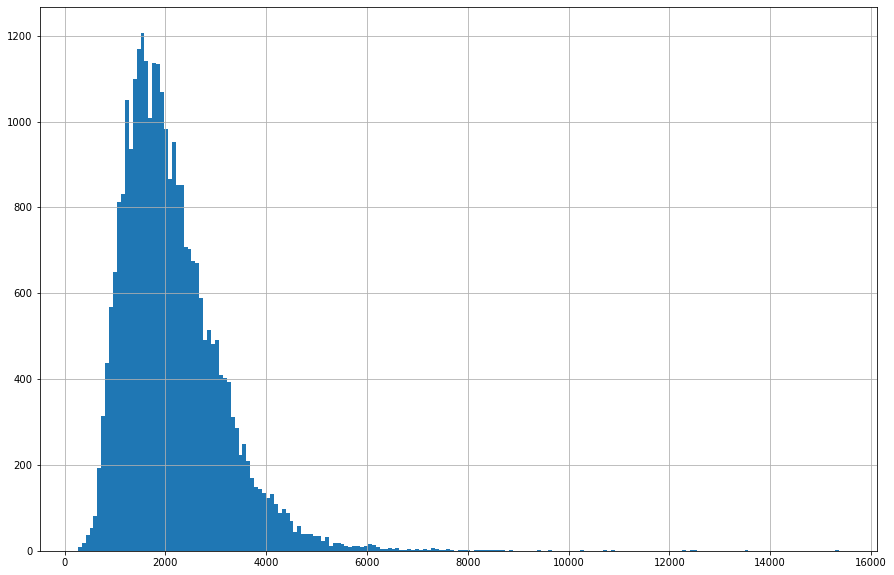

In [391]:
kc['sqft_living'].hist(figsize=(15,10), bins="auto");

As we can see above, it looks like normal curve with a slight left skew. There's also a long tail, where it appears to contain some exceptionally large size homes.

In [364]:
kc['sqft_living'].describe()

count    29187.000000
mean      2131.765649
std        976.219778
min        260.000000
25%       1440.000000
50%       1940.000000
75%       2640.000000
max      15360.000000
Name: sqft_living, dtype: float64

We can see here the maximum is quite high compared to the 75% percentile. 

Let's plot sqft vs price to see if it's a good candidate for linear regression.

<AxesSubplot:xlabel='sqft_living', ylabel='price'>

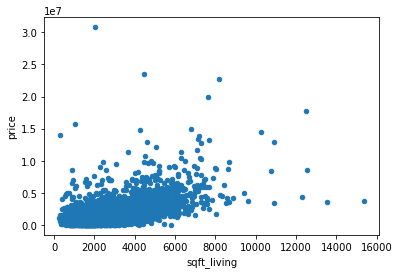

In [365]:
kc.plot.scatter("sqft_living","price")

Whelp, let's take a dive into the data and see what's what.

In [366]:
import statsmodels.api as sm

X = kc['sqft_living']
y = kc['price']

baseline_model = sm.OLS(y, sm.add_constant(X))
baseline_results = baseline_model.fit()

print(baseline_results.summary())

                            OLS Regression Results                            
Dep. Variable:                  price   R-squared:                       0.381
Model:                            OLS   Adj. R-squared:                  0.380
Method:                 Least Squares   F-statistic:                 1.793e+04
Date:                Wed, 09 Aug 2023   Prob (F-statistic):               0.00
Time:                        23:10:48   Log-Likelihood:            -4.3444e+05
No. Observations:               29187   AIC:                         8.689e+05
Df Residuals:                   29185   BIC:                         8.689e+05
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
                  coef    std err          t      P>|t|      [0.025      0.975]
-------------------------------------------------------------------------------
const       -9.324e+04   9909.664     -9.409      

## Results Discussion

The model overall explains about 38% of the variance in sale price, which is low.

Using the standard alpha of 0.05 to evaluate statistical significance:

Coefficients for the intercept as well sqft_living are all statistically significant.  According to the model, houses are selling at approximately $566/sq. ft.

The coefficients for the intercept is negative. What does that mean? Well, for a house with 0 sq ft, it would sell for -$93,000. I don't like this, but let's circle back to this later after we've added a couple additional factors.

## Additional factors.
Let's add our categorical data.

### Zipcode analysis.
To create the one-hot encoding with the categorical data for zipcode. We'll combine the square footage and zipcode columns and do one-hot encoding with dummy values.

In [367]:
zip_sq_ft = ['sqft_living', 'zipcode']

X_zip_sq_ft = kc[zip_sq_ft]

X_zip_sq_ft_dummy = pd.get_dummies(X_zip_sq_ft, columns=['zipcode'])

#let's drop zipcode 98042 as it is the most common zipcode
X_zip_sq_ft_dummy.drop('zipcode_98059', axis = 1, inplace = True)

#let's run our model
sq_ft_zip_model = sm.OLS(y, sm.add_constant(X_zip_sq_ft_dummy))
sq_ft_zip_results = sq_ft_zip_model.fit()

print(sq_ft_zip_results.summary())

                            OLS Regression Results                            
Dep. Variable:                  price   R-squared:                       0.590
Model:                            OLS   Adj. R-squared:                  0.589
Method:                 Least Squares   F-statistic:                     545.1
Date:                Wed, 09 Aug 2023   Prob (F-statistic):               0.00
Time:                        23:10:53   Log-Likelihood:            -4.2840e+05
No. Observations:               29187   AIC:                         8.570e+05
Df Residuals:                   29109   BIC:                         8.576e+05
Df Model:                          77                                         
Covariance Type:            nonrobust                                         
                    coef    std err          t      P>|t|      [0.025      0.975]
---------------------------------------------------------------------------------
const         -3.401e+04   2.47e+04     -1.375

OKay, so what does this model show? We've got improvements in our Adjusted R-Square, which is now showing a value of 59.0% of all variance accounted for. This is better. In Summary

The model overall explains about 59% of the variance in sale price, which is low.

Using the standard alpha of 0.05 to evaluate statistical significance:

Coefficients for sqft_living and most of our zipcodes are statistically significant. Our baseline zipcode is 98059. It seems that relative to our baseline, the zipcodes do have a statistically significant effect on price, except for zipcodes 98224, 98288, 98166, 98146, 98113, 98118 98027, and 98011). So... 

Our coefficient for the intercept is not significanty significant for an alpha of .05.

According to the model, houses are selling at approximately $465/sq. ft.

The coefficients for the intercept is -34,000. That means that, when not accounting for square footage or zipcode, you could assume a house will sell for -34,000. Well, that's confusing...

The zipcode with the largest effect is zipcode 98039 and 98040. Zipcode 98010 and 98092 have the most negative effect on pricing. 

### Additional Factors

So, we have a decent model with regard to Adjusted R-sqaure, accoutning for roughly 58% of the variance. However, we don't have a statistically significant coefficient and, quite frankly, we can do better with regard to

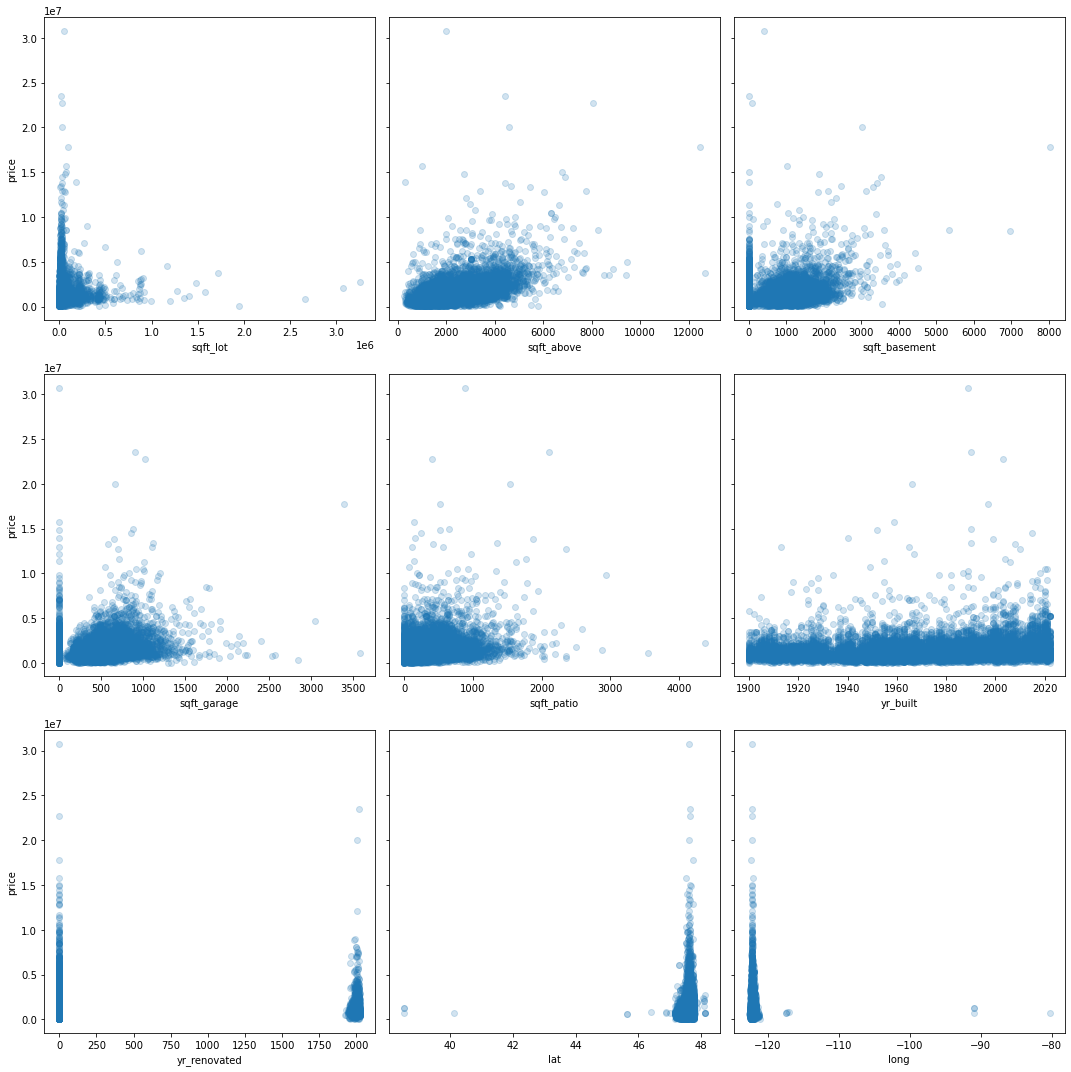

In [383]:
import matplotlib.pyplot as plt
import numpy as np

X = kc[numeric_cont].drop("date", axis=1)
X = X.drop("price", axis=1)
X = X.drop("sqft_living", axis=1)

fig, axes = plt.subplots(nrows=3, ncols=3, figsize=(15,15), sharey=True)

for i, column in enumerate(X.columns):
    # Locate applicable axes
    row = i // 3
    col = i % 3
    ax = axes[row][col]
    
    # Plot feature vs. y and label axes
    ax.scatter(X[column], y, alpha=0.2)
    ax.set_xlabel(column)
    if col == 0:
        ax.set_ylabel("price")

fig.tight_layout()

Interesting... we don't have any great linear relationships here. Perhaps we can try log relationships. There may be some good candidates. To kick this off, I'm going to return to the relationship between price and sq. ft. This time, we'll try with logs.

C:\Users\benne\anaconda3\envs\learn-env\lib\site-packages\pandas\core\series.py:726: RuntimeWarning: divide by zero encountered in log
  result = getattr(ufunc, method)(*inputs, **kwargs)
C:\Users\benne\anaconda3\envs\learn-env\lib\site-packages\pandas\core\series.py:726: RuntimeWarning: invalid value encountered in log
  result = getattr(ufunc, method)(*inputs, **kwargs)


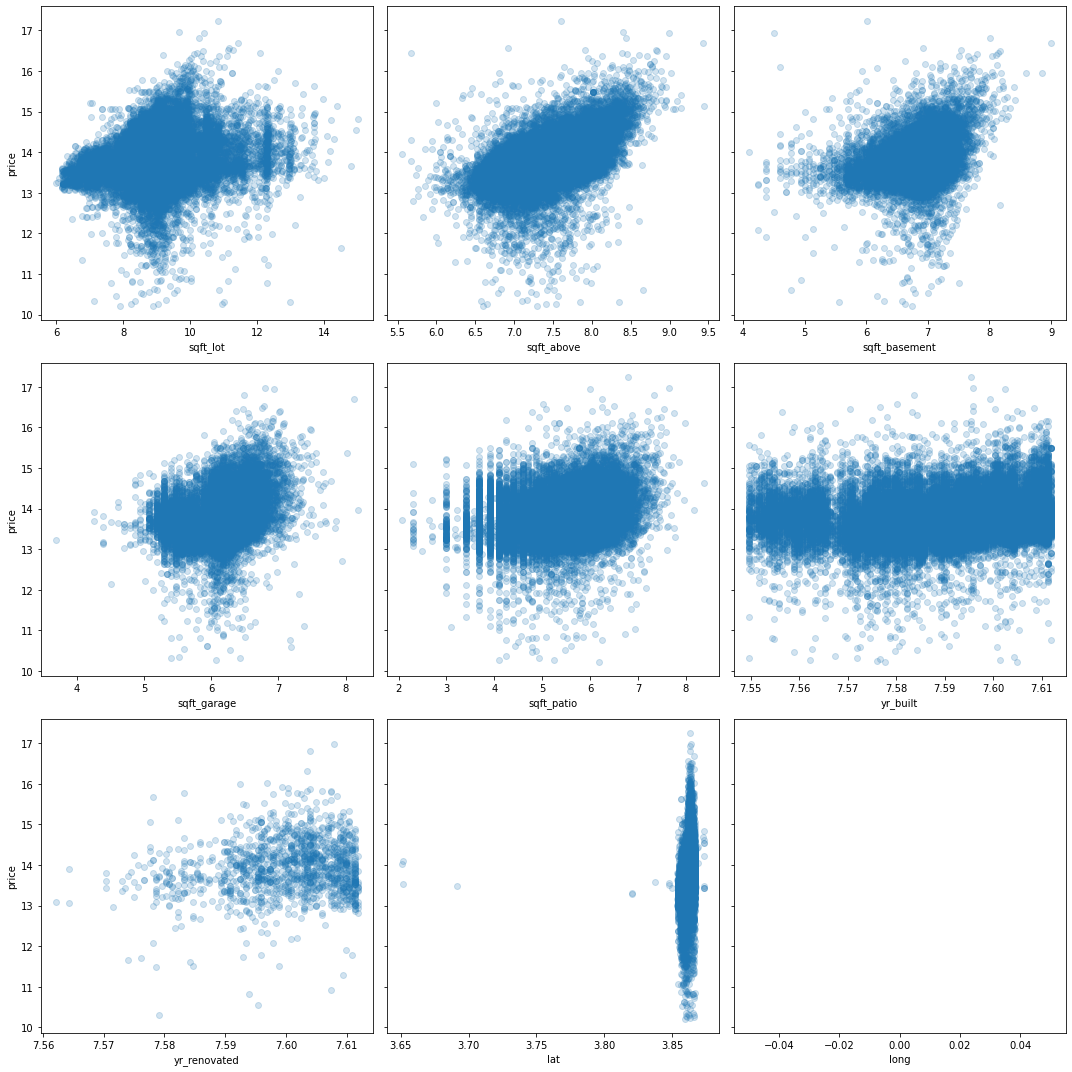

In [389]:
import matplotlib.pyplot as plt
import numpy as np

X = kc[numeric_cont].drop("date", axis=1)
X = X.drop("price", axis=1)
X = X.drop("sqft_living", axis=1)

fig, axes = plt.subplots(nrows=3, ncols=3, figsize=(15,15), sharey=True)

for i, column in enumerate(X.columns):
    # Locate applicable axes
    row = i // 3
    col = i % 3
    ax = axes[row][col]
    
    # Plot feature vs. y and label axes
    ax.scatter(np.log(X[column]), np.log(y), alpha=0.2)
    ax.set_xlabel(column)
    if col == 0:
        ax.set_ylabel("price")

fig.tight_layout()

In [388]:
X_log = np.log(1+kc['sqft_patio'])/np.log(10)
y_log = np.log(1+kc['price'])/np.log(10)

log_model = sm.OLS(y_log, sm.add_constant(X_log))
log_results = log_model.fit()


print(log_results.summary())


                            OLS Regression Results                            
Dep. Variable:                  price   R-squared:                       0.068
Model:                            OLS   Adj. R-squared:                  0.068
Method:                 Least Squares   F-statistic:                     2120.
Date:                Wed, 09 Aug 2023   Prob (F-statistic):               0.00
Time:                        23:40:21   Log-Likelihood:                -419.08
No. Observations:               29187   AIC:                             842.2
Df Residuals:                   29185   BIC:                             858.7
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const          5.8507      0.003   2020.147      0.0

In [385]:
# function to convert
def convertsqft(item):
    return int(item > 0)

has_patio = kc['sqft_patio'].apply(convertsqft)
has_basement = kc['sqft_basement'].apply(convertsqft)
has_garage = kc['sqft_garage'].apply(convertsqft)

patio_model = sm.OLS(y, sm.add_constant(has_garage))
patio_results = patio_model.fit()

print(patio_results.summary())



                            OLS Regression Results                            
Dep. Variable:                  price   R-squared:                       0.012
Model:                            OLS   Adj. R-squared:                  0.012
Method:                 Least Squares   F-statistic:                     364.7
Date:                Wed, 09 Aug 2023   Prob (F-statistic):           8.30e-81
Time:                        23:35:25   Log-Likelihood:            -4.4125e+05
No. Observations:               29187   AIC:                         8.825e+05
Df Residuals:                   29185   BIC:                         8.825e+05
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
                  coef    std err          t      P>|t|      [0.025      0.975]
-------------------------------------------------------------------------------
const        9.692e+05   9160.979    105.797      

### Discrete numeric functions.
We've got multiple discrete numeric functions which will have an effect of the saleprice. To get a high level view of this, let's look at all of the numeric variables, besides square footage.

<AxesSubplot:xlabel='floors', ylabel='price'>

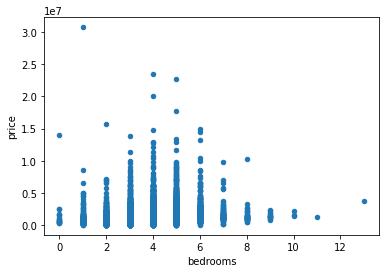

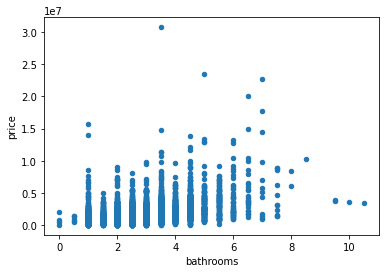

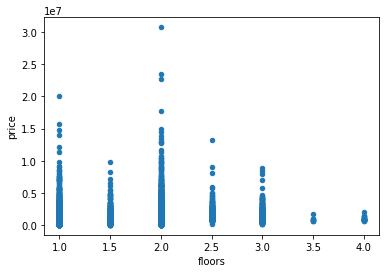

In [270]:
kc.plot.scatter('bedrooms', 'price')
kc.plot.scatter('bathrooms', 'price')
kc.plot.scatter('floors', 'price')

#kc.plot.scatter(x="weight", y="mpg", c="cylinders", cmap="plasma", alpha=0.5, ax=ax);
#pd.concat([df1, df4], axis=1)

Interesting, we can see some trends here. For the bedrooms, there seems to be a clear trend where price increases to 4 and then descreases afterwards. Similarly with bathroom, although this trend is much more flat, there seems to be a slight decreases after 4 or 4.5, once you remove some of the outliers. Also with the floors, there seems to be a trend with the peak at 2, and a smaller peak at 1. This is interesting because 3-story houses are significantly less than 1.0.

These graphs look ploynomial, with the exception of the bathroom perahps.

Let's look at some of the statistics.

In [271]:
kc[numeric_disc].describe()

,bedrooms,bathrooms,floors
count,29187.000000,29187.000000,29187.000000
mean,3.438757,2.334635,1.516720
std,0.973142,0.892564,0.548005
min,0.000000,0.000000,1.000000
25%,3.000000,2.000000,1.000000
50%,3.000000,2.500000,1.500000
75%,4.000000,3.000000,2.000000
max,13.000000,10.500000,4.000000


This is interesting, we can see the mean home is a 3 bedroom, 2.5 bath with 1.5 floors. Okay, this is a little confusing. What does 1.5 floors mean? We'll circle back to what floor mean later, because there is a little confusion about if this signifies a basement or not.

Let's add bedroom and bathroom to the model first and see what happens

In [272]:
X_combined = X_zip_sq_ft_dummy.join(kc['bathrooms'], how="inner")
X_combined = X_combined.join(kc['bedrooms'], how="inner")
X_combined

combined_model = sm.OLS(y, sm.add_constant(X_combined))
combined_results = combined_model.fit()

print(combined_results.summary())

                            OLS Regression Results                            
Dep. Variable:                  price   R-squared:                       0.599
Model:                            OLS   Adj. R-squared:                  0.598
Method:                 Least Squares   F-statistic:                     550.7
Date:                Wed, 09 Aug 2023   Prob (F-statistic):               0.00
Time:                        16:33:18   Log-Likelihood:            -4.2809e+05
No. Observations:               29187   AIC:                         8.563e+05
Df Residuals:                   29107   BIC:                         8.570e+05
Df Model:                          79                                         
Covariance Type:            nonrobust                                         
                    coef    std err          t      P>|t|      [0.025      0.975]
---------------------------------------------------------------------------------
const          1.843e+05   2.65e+04      6.967

Whelp, the bedroom and bathroom information did not really help us. But before we get to crazy, let's add the `intgrade` column and see what happens. First, let's see an effect that intgrade would have on price.

<AxesSubplot:xlabel='intgrade', ylabel='price'>

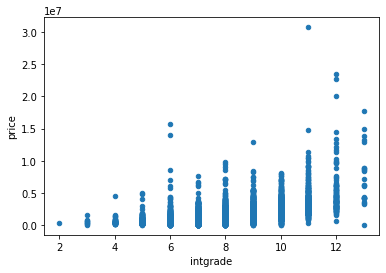

In [273]:
kc.plot.scatter('intgrade', 'price')
kc.plot.scatter('intgrade', 'price')

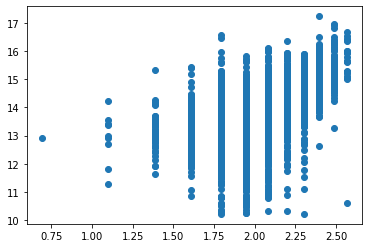

In [398]:
plt.scatter(np.log(kc['intgrade']), np.log(kc['price']))

In [291]:
X_combined_intgrade['bedrooms']

0        4
1        5
2        6
3        3
4        2
        ..
30150    5
30151    3
30152    3
30153    3
30154    3
Name: bedrooms, Length: 29187, dtype: int64

In [401]:
X_combined_intgrade = X_zip_sq_ft_dummy.join(kc['intgrade'], how="inner")
X_combined_intgrade = pd.get_dummies(X_combined_intgrade, columns=['intgrade'])

#let's drop zipcode 'intgrade_7' as it is the most common zipcode
X_combined_intgrade.drop('intgrade_7', axis = 1, inplace = True)

X_combined_intgrade_model = sm.OLS(y, sm.add_constant(X_combined_intgrade))
X_combined_intgrade_results = X_combined_intgrade_model.fit()

print(X_combined_intgrade_results.summary())

                            OLS Regression Results                            
Dep. Variable:                  price   R-squared:                       0.641
Model:                            OLS   Adj. R-squared:                  0.640
Method:                 Least Squares   F-statistic:                     589.4
Date:                Thu, 10 Aug 2023   Prob (F-statistic):               0.00
Time:                        00:09:54   Log-Likelihood:            -4.2649e+05
No. Observations:               29187   AIC:                         8.532e+05
Df Residuals:                   29098   BIC:                         8.539e+05
Df Model:                          88                                         
Covariance Type:            nonrobust                                         
                    coef    std err          t      P>|t|      [0.025      0.975]
---------------------------------------------------------------------------------
const          1.906e+05    2.4e+04      7.942

Let's try to add the condition as well. First, let's do condition.

In [294]:
X_combined_condition = X_combined_intgrade_cat.join(kc['condition'], how="inner")
X_combined_condition = pd.get_dummies(X_combined_condition, columns=['condition'])

In [295]:
X_combined_condition.drop('condition_Average', axis = 1, inplace = True)

X_combined_condition_model = sm.OLS(y, sm.add_constant(X_combined_condition))
X_combined_condition_results = X_combined_condition_model.fit()

print(X_combined_condition_results.summary())

                            OLS Regression Results                            
Dep. Variable:                  price   R-squared:                       0.643
Model:                            OLS   Adj. R-squared:                  0.641
Method:                 Least Squares   F-statistic:                     562.4
Date:                Wed, 09 Aug 2023   Prob (F-statistic):               0.00
Time:                        16:59:56   Log-Likelihood:            -4.2641e+05
No. Observations:               29187   AIC:                         8.530e+05
Df Residuals:                   29093   BIC:                         8.538e+05
Df Model:                          93                                         
Covariance Type:            nonrobust                                         
                          coef    std err          t      P>|t|      [0.025      0.975]
---------------------------------------------------------------------------------------
const                1.372e+05   2

Let's try to account for lot square footage.

In [277]:
X_combined_sqft_lot = X_combined_condition.join(kc['sqft_lot'], how="inner")

X_combined_sqft_lot_model = sm.OLS(y, sm.add_constant(X_combined_sqft_lot))
X_combined_sqft_lot_results = X_combined_sqft_lot_model.fit()

print(X_combined_sqft_lot_results.summary())

                            OLS Regression Results                            
Dep. Variable:                  price   R-squared:                       0.644
Model:                            OLS   Adj. R-squared:                  0.643
Method:                 Least Squares   F-statistic:                     560.5
Date:                Wed, 09 Aug 2023   Prob (F-statistic):               0.00
Time:                        16:34:12   Log-Likelihood:            -4.2634e+05
No. Observations:               29187   AIC:                         8.529e+05
Df Residuals:                   29092   BIC:                         8.537e+05
Df Model:                          94                                         
Covariance Type:            nonrobust                                         
                          coef    std err          t      P>|t|      [0.025      0.975]
---------------------------------------------------------------------------------------
const                 1.28e+05   2

Let's look at the year it was built.

<AxesSubplot:xlabel='yr_built_transform', ylabel='price'>

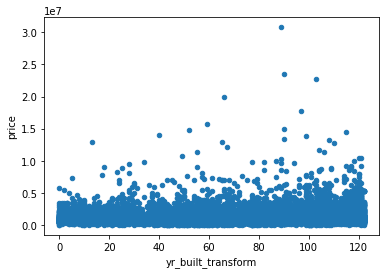

In [279]:
kc['yr_built_transform'] = kc['yr_built'] - 1900

kc.plot.scatter('yr_built_transform', 'price')

<AxesSubplot:xlabel='yr_renovated_transform', ylabel='price'>

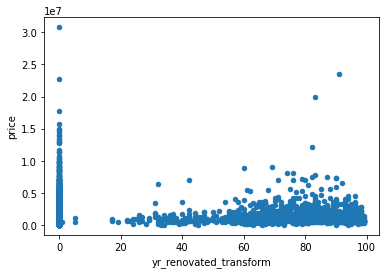

In [285]:
def yr_reno_transform (year):
    if (year > 0):
        return (year - 1923)
    else:
        return year

kc['yr_renovated_transform'] = kc['yr_renovated'].apply(yr_reno_transform)

kc.plot.scatter('yr_renovated_transform', 'price')

In [402]:
def year_reno(built, reno):
    if (reno > built):
        return reno
    else:
        return built

kc['year'] = kc['yr_renovated']
kc[kc['year']==0] = kc[kc['yr_built']==0]

KeyError: ('yr_built', 'yr_renovated')

<AxesSubplot:xlabel='sqft_garage', ylabel='price'>

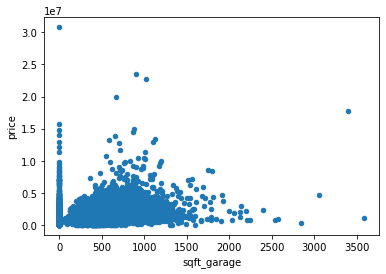

In [296]:
kc.plot.scatter('sqft_garage', 'price')

<AxesSubplot:xlabel='sqft_patio', ylabel='price'>

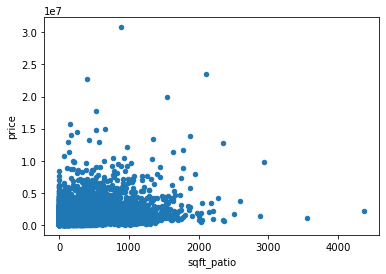

In [298]:
kc.plot.scatter('sqft_patio', 'price')

In [308]:
X_combined_view = X_combined_sqft_lot.join(kc['view'], how="inner")
X_combined_view = pd.get_dummies(X_combined_view, columns=['view'])

#let's drop zipcode 'intgrade_7' as it is the most common zipcode
X_combined_view.drop('view_NONE', axis = 1, inplace = True)

X_combined_view_model = sm.OLS(y, sm.add_constant(X_combined_view))
X_combined_view_results = X_combined_view_model.fit()

print(X_combined_view_results.summary())

                            OLS Regression Results                            
Dep. Variable:                  price   R-squared:                       0.675
Model:                            OLS   Adj. R-squared:                  0.674
Method:                 Least Squares   F-statistic:                     615.8
Date:                Wed, 09 Aug 2023   Prob (F-statistic):               0.00
Time:                        17:36:37   Log-Likelihood:            -4.2504e+05
No. Observations:               29187   AIC:                         8.503e+05
Df Residuals:                   29088   BIC:                         8.511e+05
Df Model:                          98                                         
Covariance Type:            nonrobust                                         
                          coef    std err          t      P>|t|      [0.025      0.975]
---------------------------------------------------------------------------------------
const                1.853e+05   2

In [314]:
X_combined_water = X_combined_view.join(kc['waterfront'], how="inner")
X_combined_water = pd.get_dummies(X_combined_water, columns=['waterfront'])

#let's drop zipcode 'intgrade_7' as it is the most common zipcode
X_combined_water.drop('waterfront_NO', axis = 1, inplace = True)

X_combined_water_model = sm.OLS(y, sm.add_constant(X_combined_water))
X_combined_water_results = X_combined_water_model.fit()

print(X_combined_water_results.summary())

                            OLS Regression Results                            
Dep. Variable:                  price   R-squared:                       0.683
Model:                            OLS   Adj. R-squared:                  0.682
Method:                 Least Squares   F-statistic:                     633.7
Date:                Wed, 09 Aug 2023   Prob (F-statistic):               0.00
Time:                        17:41:19   Log-Likelihood:            -4.2465e+05
No. Observations:               29187   AIC:                         8.495e+05
Df Residuals:                   29087   BIC:                         8.503e+05
Df Model:                          99                                         
Covariance Type:            nonrobust                                         
                          coef    std err          t      P>|t|      [0.025      0.975]
---------------------------------------------------------------------------------------
const                1.761e+05   2

### Polynomial Regression for Bedrooms
Let's start with bedrooms. First, we'll see if there's a good model fit between bedrooms and price.

In [304]:
kc['bedrooms_squared'] = -(kc['bedrooms']-4) ** 2
kc['bedrooms_cubed'] = kc['bedrooms'] * kc['bedrooms_squared']
quad = ['bedrooms', 'bedrooms_squared']
cubed = ['bedrooms', 'bedrooms_squared', 'bedrooms_cubed']

kc['bedrooms_squared']

#price_bedrooms_model = sm.OLS(y, sm.add_constant(kc['bedrooms_squared']))
#price_bedrooms_results = price_bedrooms_model.fit()

#price_bedrooms_squared_model = sm.OLS(y, sm.add_constant(kc[quad]))
#price_bedrooms_squared_results = price_bedrooms_squared_model.fit()

#price_bedrooms_cubed_model = sm.OLS(y, sm.add_constant(kc[cubed]))
#price_bedrooms_cubed_results = price_bedrooms_cubed_model.fit()

#print(price_bedrooms_results.summary())

0        0
1       -1
2       -4
3       -1
4       -4
        ..
30150   -1
30151   -1
30152   -1
30153   -1
30154   -1
Name: bedrooms_squared, Length: 29187, dtype: int64

KeyError: "None of [Float64Index([ 675000.0,  920000.0,  311000.0,  775000.0,  592500.0,  625000.0,\n              1317227.0,  820000.0,  780000.0,  975000.0,\n              ...\n               705000.0,  380000.0,  665000.0, 1325000.0,  719000.0, 1555000.0,\n              1313000.0,  800000.0,  775000.0,  500000.0],\n             dtype='float64', length=29187)] are in the [columns]"

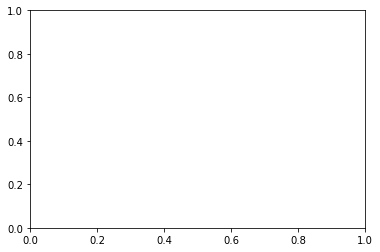

In [ ]:
X_combined_intgrade = X_combined.join(kc['intgrade'], how="inner")
X_combined_intgrade_cat = pd.get_dummies(X_combined_intgrade, columns=['intgrade'])

#let's drop zipcode 'intgrade_7' as it is the most common zipcode
X_combined_intgrade_cat.drop('intgrade_7', axis = 1, inplace = True)

X_combined_intgrade_cat_model = sm.OLS(y, sm.add_constant(X_combined_intgrade_cat))
X_combined_intgrade_cat_results = X_combined_intgrade_cat_model.fit()

print(X_combined_intgrade_cat_results.summary())

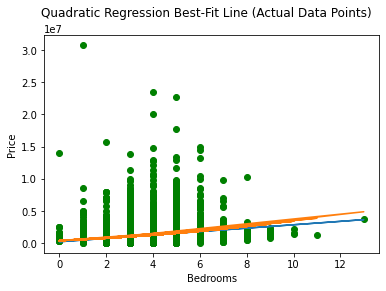

In [93]:
import matplotlib.pyplot as plt

fig, ax = plt.subplots()
ax.scatter(kc['bedrooms'], y, color='green')
ax.plot(kc['bedrooms'], price_bedrooms_results.predict(sm.add_constant(kc['bedrooms'])))
ax.plot(kc['bedrooms'], price_bedrooms_squared_results.predict(sm.add_constant(kc[quad])))

ax.set_xlabel('Bedrooms')
ax.set_ylabel('Price')
fig.suptitle("Quadratic Regression Best-Fit Line (Actual Data Points)");

Okay, that was disappointing. Perhaps we should try a log transformation and see what happens.

### Log Regression for Bedrooms
To achieve this, we'll have to address the data points that have no bathrooms. Let's see how many there are.

In [120]:
kc['bedrooms'].value_counts()

3     12746
4      9591
2      3925
5      2794
6       498
1       381
7        80
0        39
8        38
9        14
10        3
13        1
11        1
Name: bedrooms, dtype: int64

Okay, we can see the there are 39 addressed with no bedrooms. 39 out of approx, 30,000 entries is approximately .13%. I think it's fair to say that getting rid of these entries will not drastically alter the data.

In [118]:

import numpy as np

bedrooms_copy = kc['bedrooms'].copy()
bedrooms_logged = np.log(bedrooms_copy)


bedrooms_logged_model = sm.OLS(y, sm.add_constant(bedrooms_logged))
bedrooms_logged_results = bedrooms_logged_model.fit()

print(bedrooms_logged_results.summary())

                            OLS Regression Results                            
Dep. Variable:                  price   R-squared:                         nan
Model:                            OLS   Adj. R-squared:                    nan
Method:                 Least Squares   F-statistic:                       nan
Date:                Tue, 08 Aug 2023   Prob (F-statistic):                nan
Time:                        14:50:53   Log-Likelihood:                    nan
No. Observations:               30111   AIC:                               nan
Df Residuals:                   30111   BIC:                               nan
Df Model:                          -1                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const             nan        nan        nan        n

C:\Users\benne\anaconda3\envs\learn-env\lib\site-packages\numpy\linalg\linalg.py:1872: RuntimeWarning: invalid value encountered in greater
  return count_nonzero(S > tol, axis=-1)
C:\Users\benne\anaconda3\envs\learn-env\lib\site-packages\scipy\stats\_distn_infrastructure.py:1932: RuntimeWarning: invalid value encountered in less_equal
  cond2 = cond0 & (x <= _a)
C:\Users\benne\anaconda3\envs\learn-env\lib\site-packages\scipy\stats\stats.py:1617: RuntimeWarning: invalid value encountered in sign
  term2 = np.sign(denom) * np.where(denom == 0.0, np.nan,
